In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](https://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1991 et se termine avec une semaine récente.

In [2]:
data_url="https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json).

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant skiprows=1.

In [3]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202316          7  12094     7961   16227      18          12   
1     202315          7  14207     7751   20663      21          11   
2     202314          7  15247    11032   19462      23          17   
3     202313          7  13322     9700   16944      20          15   
4     202312          7  10374     7218   13530      16          11   
5     202311          7   4919     2880    6958       7           4   
6     202310          7   4854     2731    6977       7           4   
7     202309          7   7004     4548    9460      11           7   
8     202308          7   8175     5316   11034      12           8   
9     202307          7   6595     3782    9408      10           6   
10    202306          7   9595     6017   13173      14           9   
11    202305          7   6237     3907    8567       9           5   
12    202304          7   6299     3973    8625       9           6   
13    202303          7   6063     3798    8328       9           6   
14    202302          7   6576     3060   10092      10           5   
15    202301          7   8153     5470   10836      12           8   
16    202252          7   5171     2717    7625       8           4   
17    202251          7   6226     3822    8630       9           5   
18    202250          7   6590     3100   10080      10           5   
19    202249          7   5095     3212    6978       8           5   
20    202248          7   4985     3043    6927       8           5   
21    202247          7   6087     3733    8441       9           5   
22    202246          7   3033     1392    4674       5           3   
23    202245          7   3827     1720    5934       6           3   
24    202244          7   4271     2231    6311       6           3   
25    202243          7   5863     3302    8424       9           5   
26    202242          7   3770     1950    5590       6           3   
27    202241          7   4177     2219    6135       6           3   
28    202240          7   4883     1472    8294       7           2   
29    202239          7   2041      331    3751       3           0   
...      ...        ...    ...      ...     ...     ...         ...   
1660  199126          7  17608    11304   23912      31          20   
1661  199125          7  16169    10700   21638      28          18   
1662  199124          7  16171    10071   22271      28          17   
1663  199123          7  11947     7671   16223      21          13   
1664  199122          7  15452     9953   20951      27          17   
1665  199121          7  14903     8975   20831      26          16   
1666  199120          7  19053    12742   25364      34          23   
1667  199119          7  16739    11246   22232      29          19   
1668  199118          7  21385    13882   28888      38          25   
1669  199117          7  13462     8877   18047      24          16   
1670  199116          7  14857    10068   19646      26          18   
1671  199115          7  13975     9781   18169      25          18   
1672  199114          7  12265     7684   16846      22          14   
1673  199113          7   9567     6041   13093      17          11   
1674  199112          7  10864     7331   14397      19          13   
1675  199111          7  15574    11184   19964      27          19   
1676  199110          7  16643    11372   21914      29          20   
1677  199109          7  13741     8780   18702      24          15   
1678  199108          7  13289     8813   17765      23          15   
1679  199107          7  12337     8077   16597      22          15   
1680  199106          7  10877     7013   14741      19          12   
1681  199105          7  10442     6544   14340      18          11   
1682  199104          7   7913     4563   11263      14           8   
1683  199103          7  15387    10484   20290      27          18   
1684  199102          7  16277  

 Y a-t-il des points manquants dans ce jeux de données ? 

In [4]:
 raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Il n'y a pas de données manquantes

In [5]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202316          7  12094     7961   16227      18          12   
1     202315          7  14207     7751   20663      21          11   
2     202314          7  15247    11032   19462      23          17   
3     202313          7  13322     9700   16944      20          15   
4     202312          7  10374     7218   13530      16          11   
5     202311          7   4919     2880    6958       7           4   
6     202310          7   4854     2731    6977       7           4   
7     202309          7   7004     4548    9460      11           7   
8     202308          7   8175     5316   11034      12           8   
9     202307          7   6595     3782    9408      10           6   
10    202306          7   9595     6017   13173      14           9   
11    202305          7   6237     3907    8567       9           5   
12    202304          7   6299     3973    8625       9           6   
13    202303          7   6063     3798    8328       9           6   
14    202302          7   6576     3060   10092      10           5   
15    202301          7   8153     5470   10836      12           8   
16    202252          7   5171     2717    7625       8           4   
17    202251          7   6226     3822    8630       9           5   
18    202250          7   6590     3100   10080      10           5   
19    202249          7   5095     3212    6978       8           5   
20    202248          7   4985     3043    6927       8           5   
21    202247          7   6087     3733    8441       9           5   
22    202246          7   3033     1392    4674       5           3   
23    202245          7   3827     1720    5934       6           3   
24    202244          7   4271     2231    6311       6           3   
25    202243          7   5863     3302    8424       9           5   
26    202242          7   3770     1950    5590       6           3   
27    202241          7   4177     2219    6135       6           3   
28    202240          7   4883     1472    8294       7           2   
29    202239          7   2041      331    3751       3           0   
...      ...        ...    ...      ...     ...     ...         ...   
1660  199126          7  17608    11304   23912      31          20   
1661  199125          7  16169    10700   21638      28          18   
1662  199124          7  16171    10071   22271      28          17   
1663  199123          7  11947     7671   16223      21          13   
1664  199122          7  15452     9953   20951      27          17   
1665  199121          7  14903     8975   20831      26          16   
1666  199120          7  19053    12742   25364      34          23   
1667  199119          7  16739    11246   22232      29          19   
1668  199118          7  21385    13882   28888      38          25   
1669  199117          7  13462     8877   18047      24          16   
1670  199116          7  14857    10068   19646      26          18   
1671  199115          7  13975     9781   18169      25          18   
1672  199114          7  12265     7684   16846      22          14   
1673  199113          7   9567     6041   13093      17          11   
1674  199112          7  10864     7331   14397      19          13   
1675  199111          7  15574    11184   19964      27          19   
1676  199110          7  16643    11372   21914      29          20   
1677  199109          7  13741     8780   18702      24          15   
1678  199108          7  13289     8813   17765      23          15   
1679  199107          7  12337     8077   16597      22          15   
1680  199106          7  10877     7013   14741      19          12   
1681  199105          7  10442     6544   14340      18          11   
1682  199104          7   7913     4563   11263      14           8   
1683  199103          7  15387    10484   20290      27          18   
1684  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de semaine est collé à l'année, donnant l'impression qu'il s'agit de nombre entier. C'est comme ça que Pandas les interprète.Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.

Il faut lui fournir les dates de début et de fin de semaine. Nous utilisons pour cela la bibliothèque isoweek.Comme la conversion des semaines est devenu assez complexe, nous écrivons une petite fonction Python pour cela.

Ensuite, nous l'appliquons à tous les points de nos donnés. Les résultats vont dans une nouvelle colonne 'period'.

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation comme nouvel index de notre jeux de données. 

Ceci en fait une suite chronologique, ce qui sera pratique par la suite.Deuxièmement, nous trions les points par période, dans le sens chronologique.

In [7]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être zéro, ou au moins très faible. 

Nous laissons une "marge d'erreur" d'une seconde.

Ceci s'avère tout à fait juste.

In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

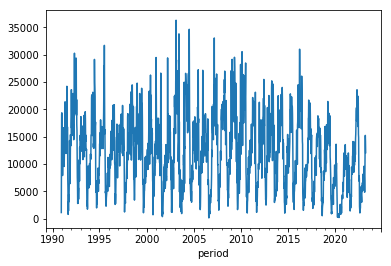

In [9]:
sorted_data['inc'].plot()

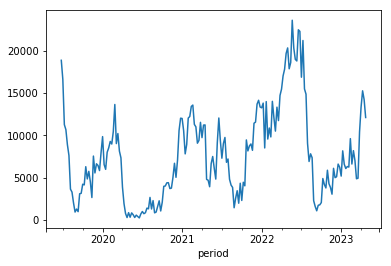

In [10]:
 sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Nous définissons la période de référence entre deux minima de l'incidence, du 1er septembre de l'année N au 1er septembre de l'année N+1.

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du 1er septembre de chaque année, nous utilisons le premier jour de la semaine qui contient le 1er septembre.

Encore un petit détail: les données commencent en décembre 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [11]:
 first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. 

Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [12]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

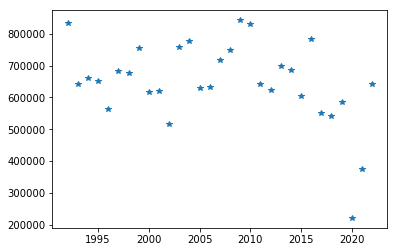

In [13]:
 yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [14]:
 yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population française, sont assez rares: il y en eu une au cours des 35 dernières années.

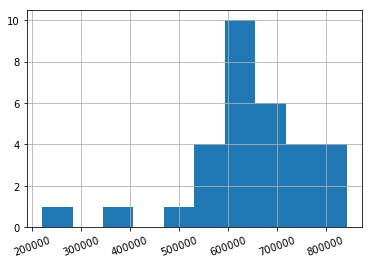

In [15]:
yearly_incidence.hist(xrot=20)